In [2]:
from Mnist_MoE.train_MoE import moe_train_loop, create_moe_model

nb_experts = 7

moe = create_moe_model(
        nb_experts=nb_experts, 
        k_training=3,
        k_inference=2, 
        tau=1.2, 
        lambda_balance=0.05 
    )

In [3]:


# Routing policy: 'hard' (tok_K), 'soft' (sotfmax or gumbell_softmax), 'hybrid' (soft with a thresholding)
accuracies = {}
moe_train_info = moe_train_loop(moe, 
                                epochs=10, # Increased epochs as balancing takes time to converge
                                selection_policy_t='soft',
                                selection_policy_i='hard', 
                                gumbell_softmax_t=True,
                                gumbell_softmax_i=False, 
                                threshold=None)
accuracies.update(moe_train_info[0])


Starting MoE training...
Number of Experts: 7 | k_training: 3 | k_inference: 2

experts: Expert 1: MNIST_CNN2, Expert 2: MNIST_CNN2, Expert 3: MNIST_CNN2, Expert 4: MNIST_CNN2, Expert 5: MNIST_CNN2, Expert 6: MNIST_CNN2, Expert 7: MNIST_CNN2

Epoch [1/10] - Train Loss: 0.2783, Train Acc: 93.07% | Test Loss: 0.1614, Test Acc: 96.24%
Expert Repartition: ['0.176', '0.132', '0.155', '0.093', '0.083', '0.153', '0.209']
 Lambda Balance: 0.050000

Epoch [2/10] - Train Loss: 0.1366, Train Acc: 97.50% | Test Loss: 0.1913, Test Acc: 96.40%
Expert Repartition: ['0.274', '0.067', '0.113', '0.086', '0.057', '0.236', '0.168']
 Lambda Balance: 0.050000

Epoch [3/10] - Train Loss: 0.1198, Train Acc: 98.01% | Test Loss: 0.0799, Test Acc: 98.23%
Expert Repartition: ['0.035', '0.119', '0.107', '0.107', '0.228', '0.194', '0.210']
 Lambda Balance: 0.050000

Epoch [4/10] - Train Loss: 0.1072, Train Acc: 98.39% | Test Loss: 0.0836, Test Acc: 98.19%
Expert Repartition: ['0.227', '0.084', '0.174', '0.011', '0

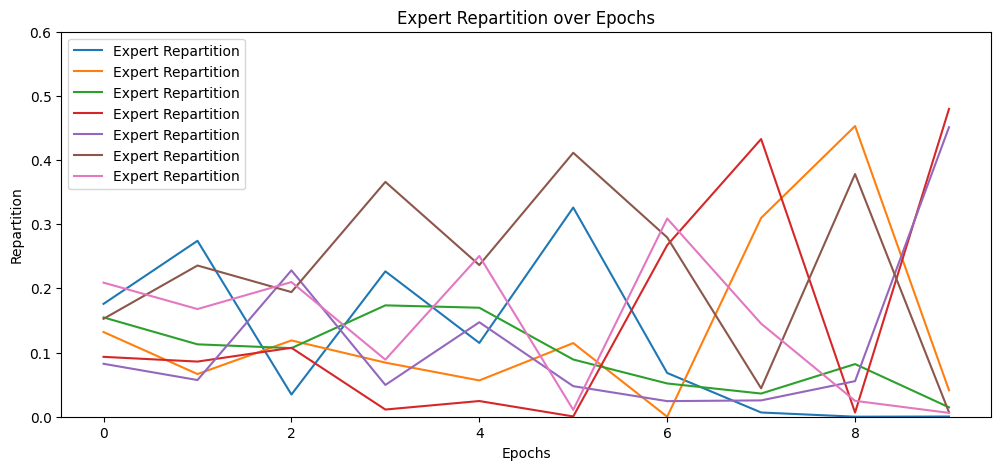

In [4]:
import matplotlib.pyplot as plt
informations = moe_train_info[1]

plt.figure(figsize=(12, 5))
plt.plot([informations[epoch]["repartition"] for epoch in informations], label="Expert Repartition")
plt.xlabel("Epochs")
plt.ylim(0, 0.6)
plt.ylabel("Repartition")
plt.title("Expert Repartition over Epochs")
plt.legend()
plt.show()

In [12]:
from Mnist_MoE.train_MoE import moe_eval_on_class
class_expert_acuation = moe_eval_on_class(moe, k=2, selection_policy='hard', gumbell_softmax=False)

Class 0 - Test Loss: 0.0886, Test Acc: 98.98% | Expert Repartition: [0.01989795918367347, 0.3198979591836735, 0.275, 0.05153061224489796, 0.1836734693877551, 0.07397959183673469, 0.0760204081632653]

Class 1 - Test Loss: 0.0082, Test Acc: 99.47% | Expert Repartition: [0.007929515418502203, 0.17048458149779736, 0.027753303964757708, 0.05066079295154185, 0.3096916299559471, 0.23083700440528634, 0.2026431718061674]

Class 2 - Test Loss: 0.0336, Test Acc: 98.55% | Expert Repartition: [0.003391472868217054, 0.3241279069767442, 0.3323643410852713, 0.011627906976744186, 0.20348837209302326, 0.08430232558139535, 0.040697674418604654]

Class 3 - Test Loss: 0.0337, Test Acc: 99.01% | Expert Repartition: [0.00891089108910891, 0.4158415841584158, 0.31485148514851485, 0.012376237623762377, 0.15198019801980198, 0.054455445544554455, 0.041584158415841586]

Class 4 - Test Loss: 0.0381, Test Acc: 98.98% | Expert Repartition: [0.008655804480651732, 0.15122199592668026, 0.025458248472505093, 0.0397148676

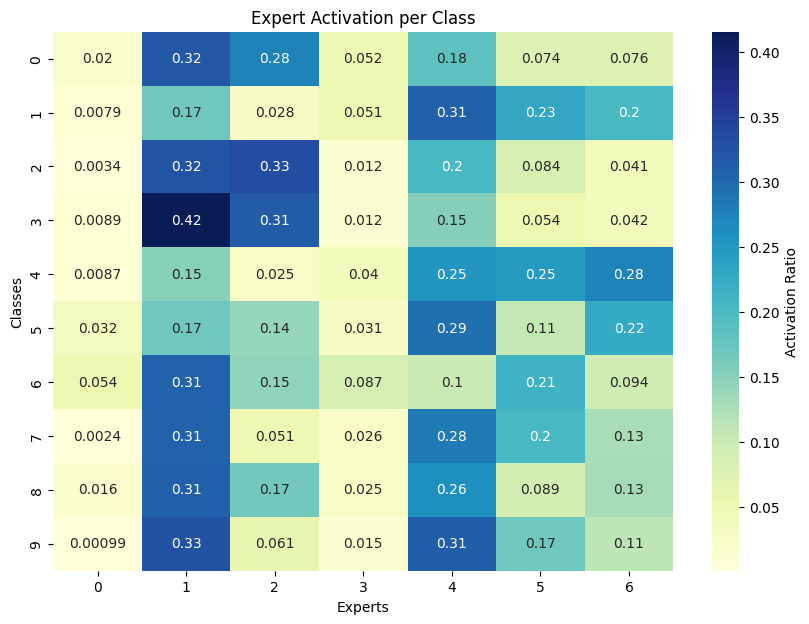

In [14]:
import seaborn as sns

# Extract the repartition arrays for each class and stack into a 2D array
import numpy as np
repartition_matrix = np.stack([class_expert_acuation[c]['repartition'] for c in class_expert_acuation])

plt.figure(figsize=(10, nb_experts))
sns.heatmap(repartition_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Activation Ratio'})
plt.xlabel("Experts")
plt.ylabel("Classes")
plt.title("Expert Activation per Class")
plt.show()

In [6]:
from Mnist_MoE.train_dense import train_dense_model

accuracies.update(train_dense_model())

Using device: cuda
Training Dense Model for 10 epochs...

Starting training...
Epoch [1/10], Step [100/938], Loss: 0.5677, Train Acc: 82.02%
Epoch [1/10], Step [200/938], Loss: 0.1743, Train Acc: 88.26%
Epoch [1/10], Step [300/938], Loss: 0.1580, Train Acc: 90.62%
Epoch [1/10], Step [400/938], Loss: 0.1354, Train Acc: 91.89%
Epoch [1/10], Step [500/938], Loss: 0.1000, Train Acc: 92.92%
Epoch [1/10], Step [600/938], Loss: 0.1065, Train Acc: 93.56%
Epoch [1/10], Step [700/938], Loss: 0.0954, Train Acc: 94.10%
Epoch [1/10], Step [800/938], Loss: 0.0997, Train Acc: 94.45%
Epoch [1/10], Step [900/938], Loss: 0.0936, Train Acc: 94.74%

Epoch 1 - Test Accuracy: 98.24%

Best model saved to ./Mnist_MoE/Mnist_MoE_experts/dense_model.pth with accuracy 98.24%

Epoch [2/10], Step [100/938], Loss: 0.0814, Train Acc: 97.36%
Epoch [2/10], Step [200/938], Loss: 0.0777, Train Acc: 97.58%
Epoch [2/10], Step [300/938], Loss: 0.0816, Train Acc: 97.60%
Epoch [2/10], Step [400/938], Loss: 0.0678, Train Acc: 

In [7]:
print("\nExpert Accuracies:")
for expert, acc in accuracies.items():
    print(f"{expert}: {acc:.2f}%")


Expert Accuracies:
MoE_Model: 98.56%
Dense_Model: 99.22%
